# MINST Fashion dataset
We would like to train a neural network model to classify images of clothing, like sneakers and shirts.

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

Label	Description:

*   **0**	T-shirt/top
*   **1**	Trouser
*   **2**	Pullover
*  **3**	Dress
*   **4**	Coat
*   **5**	Sandal
*   **6**	Shirt
*  **7**	Sneaker
*   **8**	Bag
*  **9**	Ankle boot

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import datetime 
import numpy as np

In [2]:
tf.__version__

'2.1.0'

In [3]:
data = datasets.fashion_mnist

In [4]:
(train_images, train_labels),(test_images, test_labels) = data.load_data()

In [5]:
#Define single label names (they are not included with the dataset)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
test_images.shape

(10000, 28, 28)

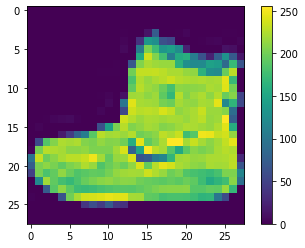

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.grid(False)
plt.colorbar()
plt.show()


In [9]:
# preprocess te data (scale the image values to a range 0 to 1)
# this will change our pics into gray scale 
train_images = train_images /255.0
test_images = test_images / 255.0

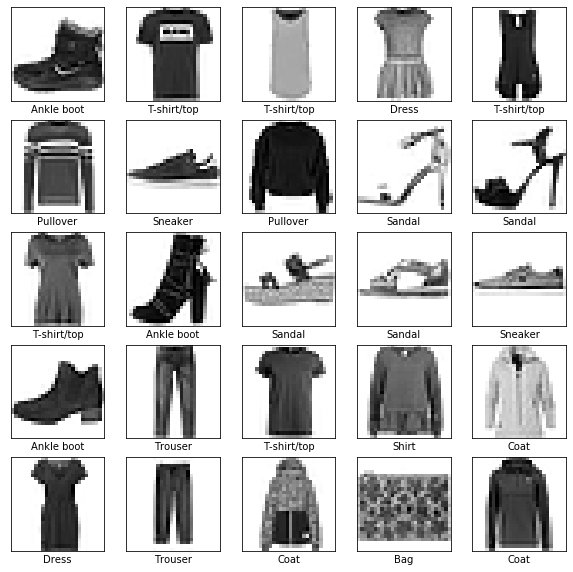

In [10]:
# Now lets plot the first 25 images form our data set
plt.figure(figsize=(10,10))
for _ in range(25):
    plt.subplot(5,5, _+1)
    plt.imshow(train_images[_],cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(class_names[train_labels[_]])
plt.show()


In [11]:
train_images.shape


(60000, 28, 28)

In [12]:
model = keras.Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))


# we can also make our model like this

# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(28, 28)),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dense(10)
# ])



In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(train_images,train_labels,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.4969 - accuracy: 0.8264
Epoch 2/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3730 - accuracy: 0.8653
Epoch 3/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3359 - accuracy: 0.8775
Epoch 4/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3122 - accuracy: 0.8846
Epoch 5/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2952 - accuracy: 0.8912
Epoch 6/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2794 - accuracy: 0.8971
Epoch 7/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2674 - accuracy: 0.9007
Epoch 8/10
60000/60000 [==============================] - ETA: 0s - loss: 0.2566 - accuracy: 0.90 - 3s 51us/sample - loss: 0.2567 - accuracy: 0.9043
Epoch 9/10
60000/60000 [==============================] - 3s 51us/sample - loss

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels,verbose=1)

print('\nTest accuracy:', test_acc)


10000/10000 [==============================] - 1s 61us/sample - loss: 0.3404 - accuracy: 0.8854

Test accuracy: 0.8854


In [16]:
predictions = model.predict(test_images)

In [17]:
predictions[0]

array([3.5966536e-07, 9.7880253e-11, 8.5028562e-09, 7.3215328e-10,
       5.1507971e-08, 3.9043714e-04, 5.4144800e-07, 2.5230331e-02,
       3.1279995e-07, 9.7437799e-01], dtype=float32)

In [18]:
np.argmax(predictions[0])

9

In [19]:
test_labels[0]

9

In [20]:
for i in range(20):
    pred = np.argmax(predictions[i])
    
    if pred == test_labels[i]:
        print("Right")
    else:
        print('Wrong')

Right
Right
Right
Right
Right
Right
Right
Right
Right
Right
Right
Right
Wrong
Right
Right
Right
Right
Wrong
Right
Right


In [21]:
# first we plot the image 
def plot_image(i, prediction_array, true_labels, img):
#     plt.show(img);
    prediction_array,true_label,  img = prediction_array, true_labels[i], img[i]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img , cmap=plt.cm.binary)
    
    predicted_label = np.argmax(prediction_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
               100*np.max(prediction_array),class_names[true_label]),color=color)
    

In [30]:
def plot_bar(i, predictions_array,true_labels):
    predictions_array, true_label = predictions_array, true_labels[i]
    plt.grid(False)
    plt.yticks([])
    plt.xticks(range(10))
    thisplot = plt.bar(range(10),predictions_array, color="#777777")
    

    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    
    
    
    
# def plot_value_array(i, predictions_array, true_label):
#   predictions_array, true_label = predictions_array, true_label[i]
#   plt.grid(False)
#   plt.xticks(range(10))
#   plt.yticks([])
#   thisplot = plt.bar(range(10), predictions_array, color="#777777")
#   plt.ylim([0, 1])
#   predicted_label = np.argmax(predictions_array)

#   thisplot[predicted_label].set_color('red')
#   thisplot[true_label].set_color('blue')

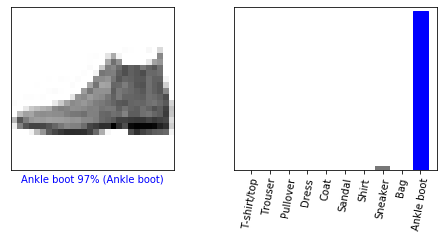

In [31]:
i = 0
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_bar(i, predictions[i],  test_labels)
plt.xticks(range(10), class_names, rotation=80)
plt.show()

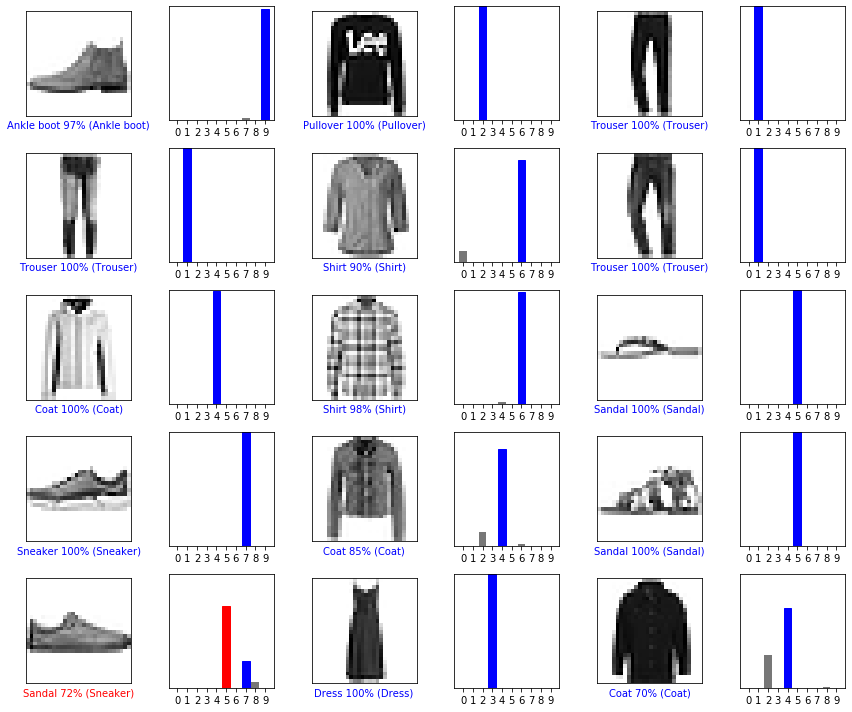

In [32]:
num_rows = 5 
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_bar(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. 
# Accordingly, even though you're using a single image, you need to add it to a list:

In [33]:
# Add the image to a batch where it's the only member.

img = test_images[1]
img.shape

(28, 28)

In [34]:
img = np.expand_dims(img, 0)

In [35]:
img.shape

(1, 28, 28)

In [36]:
p = model.predict(img)

In [40]:
# predicted label
class_names[np.argmax(p)]

'Pullover'

In [42]:
# Actual label
class_names[test_labels[1]]

'Pullover'